In [1]:
import pandas as pd

# Load the dataset
file_path = 'imbd_movies_india.csv'

In [6]:
# Attempting to read the file with a different encoding
try:
    movies_data = pd.read_csv(file_path, encoding='ISO-8859-1')
except Exception as e:
    error_message = str(e)
    movies_data = None

In [7]:
# If successful, display the first few rows; otherwise, show the error message
if movies_data is not None:
    movies_data_head = movies_data.head()
else:
    movies_data_head = error_message

movies_data_head

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# 1. Handling Missing Values: Removing rows where 'Rating' is missing
movies_data_clean = movies_data.dropna(subset=['Rating'])

# 2. Feature Engineering
# Selecting a subset of features for the model
features = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = movies_data_clean[features]
y = movies_data_clean['Rating']

In [17]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Pipeline for numerical features
numerical_features = ['Year', 'Duration']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [18]:
# Pipeline for categorical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Preprocessor for column transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [20]:
# Creating the regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [21]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Duration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3'])])),
                ('regressor', LinearRegression())])

In [22]:
# Predicting on test set
y_pred = model.predict(X_test)

In [23]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(4.477750770673898, -3.70022618158575)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing the data for the regression chart
# We use the cleaned dataset with non-null ratings
data_for_chart = movies_data_clean[['Year', 'Rating']].dropna()

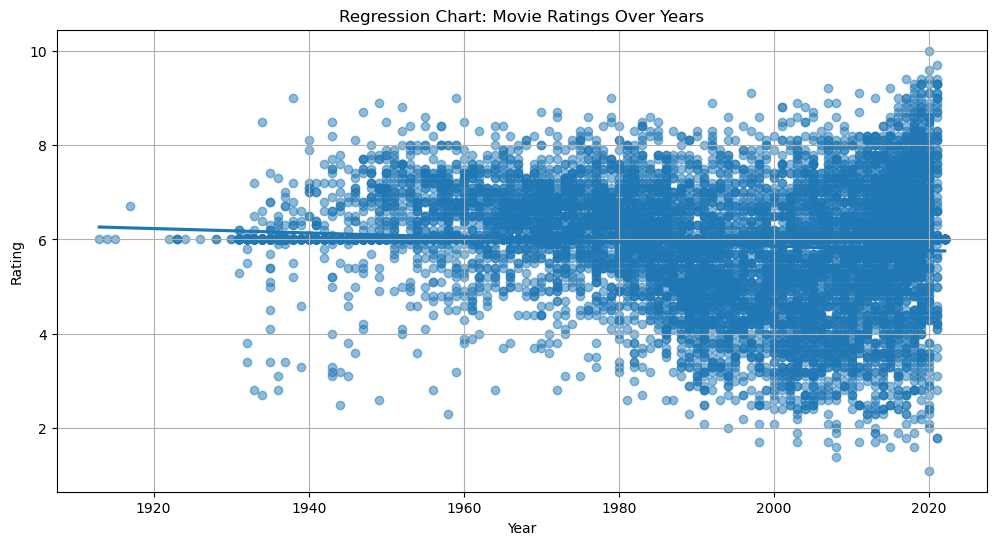

In [25]:
# Creating the regression chart
plt.figure(figsize=(12, 6))
sns.regplot(x='Year', y='Rating', data=data_for_chart, scatter_kws={'alpha':0.5})
plt.title('Regression Chart: Movie Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [26]:
# Preparing the data for the summary chart
# Selecting a subset of features for the summary chart
features_for_summary = ['Year', 'Duration', 'Genre', 'Director', 'Rating']

In [27]:
# Creating a dataframe for the summary chart
data_for_summary = movies_data_clean[features_for_summary].dropna()

In [28]:
# Creating the summary chart
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

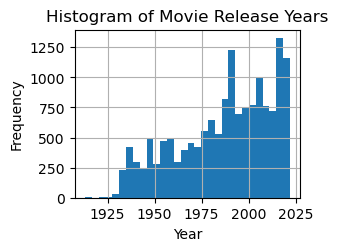

In [29]:
# Histogram for 'Year'
plt.subplot(2, 2, 1)
data_for_summary['Year'].hist(bins=30)
plt.title('Histogram of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

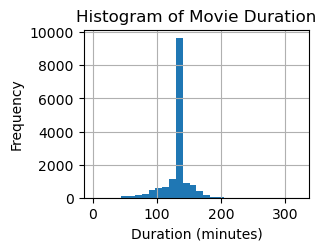

In [30]:
# Histogram for 'Duration'
plt.subplot(2, 2, 2)
data_for_summary['Duration'].hist(bins=30)
plt.title('Histogram of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

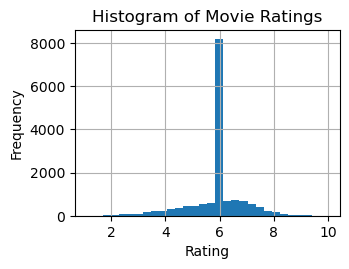

In [31]:
# Histogram for 'Rating'
plt.subplot(2, 2, 3)
data_for_summary['Rating'].hist(bins=30)
plt.title('Histogram of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()